# Machine Learning

### Q1

Imagine you have a dataset where you have different Instagram features
like 'username' , 'Caption' , 'Hashtag' , 'Followers' , 'Time_Since_posted' , and 'likes' , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.

[Dataset](https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach)

This is the Dataset You can use this dataset for this question.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('instagram_reach.csv')

In [ ]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
df.drop(columns = ['Unnamed: 0', 'S.No'], axis = 1, inplace = True)
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


6 missing values in Caption. However, these are paragraphs, so we can ignore them in the model

Normally, more the followers, more is the reach of the posts. So it is more likely to receive more likes. 

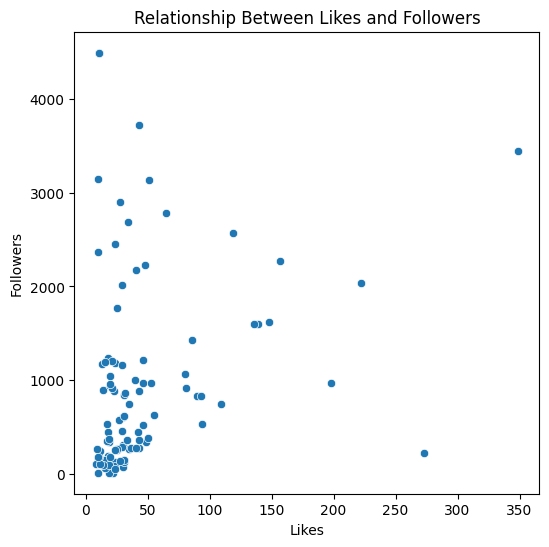

In [5]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='Likes', y ='Followers')
plt.title("Relationship Between Likes and Followers")
plt.show()

<Figure size 2000x600 with 0 Axes>

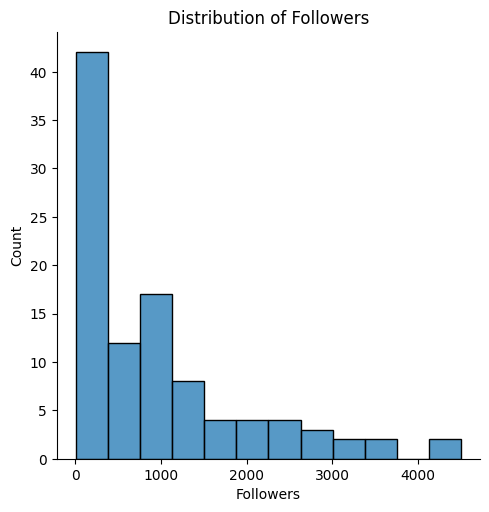

In [6]:
plt.figure(figsize=(20,6))
sns.displot(df['Followers'])
plt.title("Distribution of Followers")
plt.show()

<Figure size 2000x600 with 0 Axes>

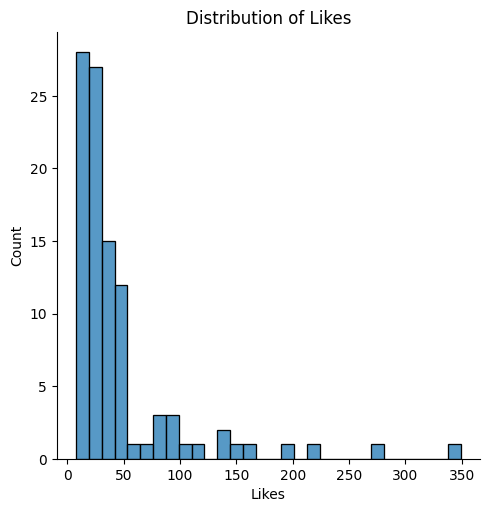

In [7]:
plt.figure(figsize=(20,6))
sns.displot(df['Likes'])
plt.title("Distribution of Likes")
plt.show()

In [8]:
df['Time since posted'].value_counts()

2 hours     57
3 hours     19
4 hours     13
7 hours      3
11 hours     2
8 hours      1
9 hours      1
5 hours      1
20 hours     1
14 hours     1
24 hours     1
Name: Time since posted, dtype: int64

In [9]:
# We can apply a simple function to consider only the numeric values for Time Since Posted
def get_time_numerals(s: str) -> int:
    return int(s[:-6])

In [ ]:
# get_time_numerals('2 hours')

In [10]:
df['Time since posted'] = df['Time since posted'].apply(lambda x: get_time_numerals(x))

In [11]:
df['Time since posted'].dtype

dtype('int64')

In [12]:
# Model for predicting likes

In [13]:
X = df.drop(columns = 'Likes', axis = 1)
y = df.Likes

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
lr_likes = LinearRegression()

In [17]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
lr_likes.fit(X_train, y_train)

LinearRegression()

In [19]:
y_likes = lr_likes.predict(X_test)

In [21]:
mean_absolute_error(y_test, y_likes)

24.542716522542936

In [23]:
r2_score(y_test, y_likes)

0.2568938575006733

In [24]:
mean_squared_error(y_test, y_likes)

1152.7508346135055

In [25]:
# Model for predicting time since posted (in hours)

In [27]:
X = df.drop(columns = 'Time since posted', axis = 1)
y = df['Time since posted']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
lr_time = LinearRegression()
lr_time.fit(X_train, y_train)
y_time = lr_time.predict(X_test)

In [29]:
mean_absolute_error(y_test, y_time)

1.8068947365681924

In [30]:
mean_squared_error(y_test, y_time)

5.606833911771963

In [31]:
r2_score(y_test, y_time)

0.2680373483326419